Recently, the whole world is dealing with the same issue. Although there is a lot of misleading information on social media, it is a great opportunity for us to reach correct information and a structured dataset like this.

This dataset contains patients infected with COVID-19 in South Korea. In this analysis, I tried to figure out to answer some questions such as ** "which reasons are behind the infection?" **, ** "is there any correlation between treatment duration and age?" **.

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
patient=pd.read_csv('../input/coronavirusdataset/patient.csv')

**Update:** South Korea has 8162 coronavirus cases.


In these statistics below we can say that **96,4%** of the total cases are included in our dataset.

In [3]:
patient.count()

patient_id          7869
sex                  679
birth_year           666
country             7869
region               437
disease               28
group                 86
infection_reason     154
infection_order       36
infected_by           70
contact_number        53
confirmed_date      7869
released_date         56
deceased_date         36
state               7869
dtype: int64

 Columns raletad dates come as object. We will convert them to datetime later.

In [4]:
patient.dtypes

patient_id            int64
sex                  object
birth_year          float64
country              object
region               object
disease             float64
group                object
infection_reason     object
infection_order     float64
infected_by         float64
contact_number      float64
confirmed_date       object
released_date        object
deceased_date        object
state                object
dtype: object

There is a column named "infection_reason". Let's look at the distribution of the reasons for the infection.

In [5]:
patient.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [6]:
func = lambda x: 100*x.count()/patient['infection_reason'].dropna().shape[0]
reason_by_age=patient.pivot_table("patient_id",index="infection_reason",aggfunc=func)\
.sort_values(by="patient_id",ascending=False);
reason_by_age

,patient_id
infection_reason,
contact with patient,49.350649
visit to Daegu,32.467532
visit to Wuhan,5.194805
pilgrimage to Israel,3.896104
contact with patient in Singapore,1.298701
residence in Wuhan,1.298701
visit to China,1.298701
visit to Thailand,1.298701
contact with patient in Daegu,0.649351


Almost half of the patients were infected by interaction with other infected people. Visiting another city is less common among infection reasons. Let's see if infection reason has changed depending on time.

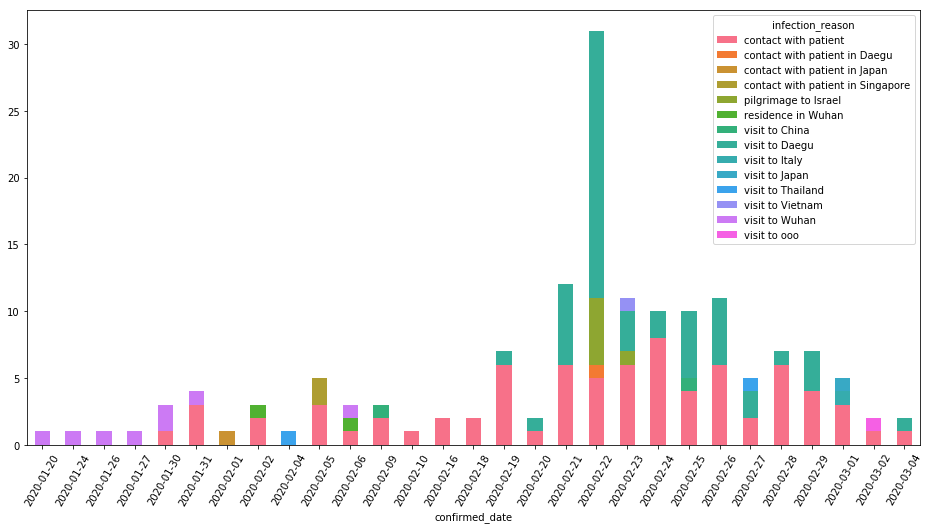

In [7]:
reasonsbydate=patient.pivot_table(index='confirmed_date', columns='infection_reason',values='patient_id',aggfunc="count")
colors = sns.color_palette("husl", n_colors=len(patient['infection_reason'].unique()))
reasonsbydate.plot.bar(stacked=True, figsize=(16,8), rot=60, color=colors)

The first 4 days "visit to Wuhan" is the only reason for the infection. I guess after Wuhan quarantined, it is left its place to other reasons. As we know the virus is highly contagious, in cases occur every day we see that "contact with patient" is the one of the main reason why **covid-19** is spreading so quickly. It is great that we are able to confirm what doctors say to us with data. 

In [8]:
patient['age'] = 2020 - patient['birth_year']
patient['age'].describe()


count    666.000000
mean      45.728228
std       17.423250
min        2.000000
25%       30.000000
50%       46.000000
75%       58.000000
max       91.000000
Name: age, dtype: float64

There is a lot of missing values on age column. We remove it before move forward.

In [9]:
age=patient['age'].dropna()

After removing missing values there is only 666 patient left, what an interesting number...

In [10]:
age.count() 

666

On the histogram below it looks like "bimodal" since it has two values or data ranges that appear most often in the data. 

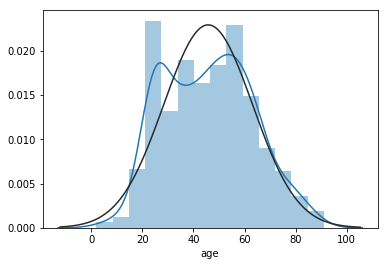

<Figure size 432x288 with 0 Axes>

In [11]:
sns.distplot(age, fit=norm);
fig = plt.figure()

Let's see the histogram for gender breakdown.

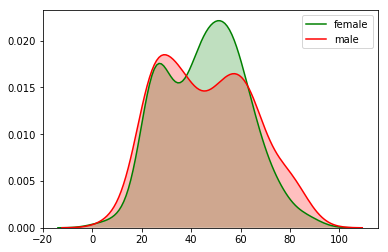

In [12]:
age_gender= pd.concat([patient['age'], patient['sex']], axis=1).dropna(); age_gender
sns.kdeplot(age_gender.loc[(age_gender['sex']=='female'), 
            'age'], color='g', shade=True, Label='female')

sns.kdeplot(age_gender.loc[(age_gender['sex']=='male'), 
            'age'], color='r', shade=True, Label='male')

Although the distribution for the female looks normal, there are 2 peaks at age 20 and age 50. Also, the mean age for the female looks higher than male.
![](http://)Besides, the percentage of infected people is higher in female which is 57%.

In [13]:
func = lambda x: 100*x.count()/patient['sex'].dropna().shape[0]
gender_by_age=patient.pivot_table("patient_id", index="sex", aggfunc=func)\
.sort_values(by="patient_id", ascending=False); gender_by_age

,patient_id
sex,
female,57.879234
male,42.120766


Let's draw a box plot and a stacked bar plot to gain more information on the variability and how the values in the data are spread out.

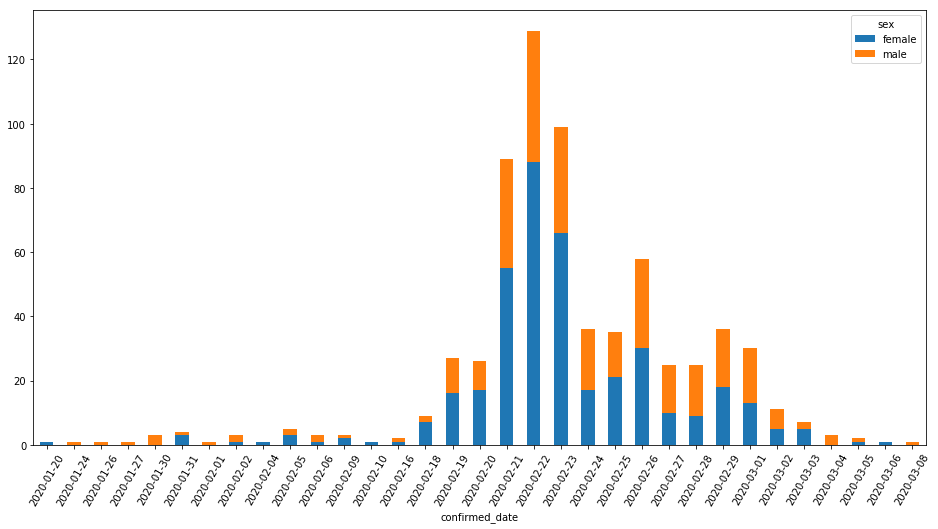

In [14]:
genderbydate=patient.pivot_table(index='confirmed_date', columns='sex',values='patient_id',aggfunc="count")
genderbydate.plot.bar(stacked=True, figsize=(16,8), rot=60)

Even though the number of cases is decreasing for both genders, the number of cases on females decreases drastically.

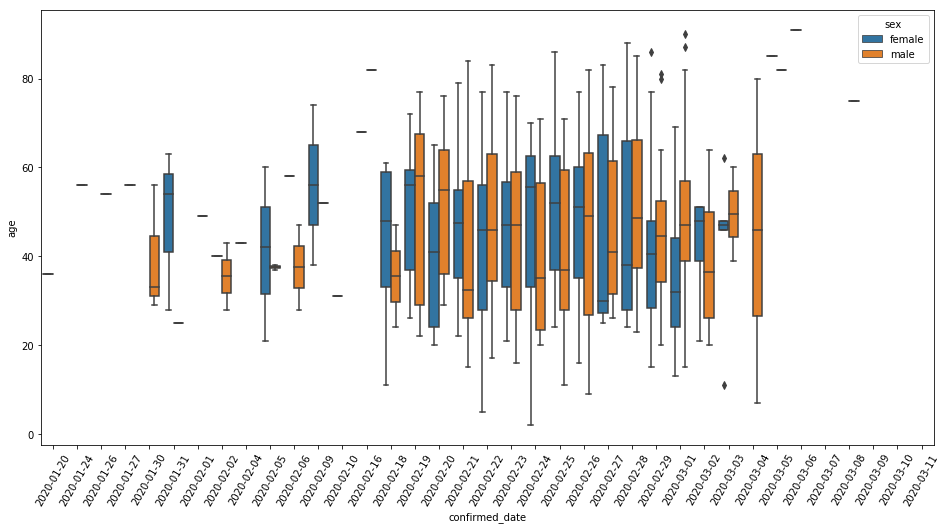

In [15]:
data = pd.concat([patient['age'], patient['sex'], patient['confirmed_date']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='confirmed_date', y='age', hue='sex', data=data)
plt.xticks(rotation=60);

Although it's not a strong difference between gender, in men it can be seen that a spread in all age groups.

We have both released and confirmed date of each patient. Let's look at the distribution of the duration of discharged.

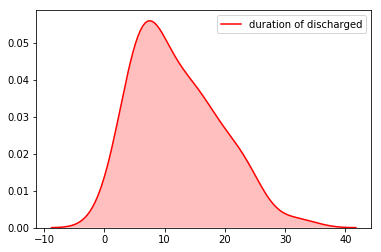

In [16]:
patient['confirmed_date']=pd.to_datetime(patient['confirmed_date'])
patient['released_date']=pd.to_datetime(patient['released_date'])
patient['discharged']=patient['released_date']-patient['confirmed_date']
patient['discharged']=patient['discharged'].astype('timedelta64[D]')
sns.kdeplot(patient['discharged'], color='r', shade=True, Label="duration of discharged")

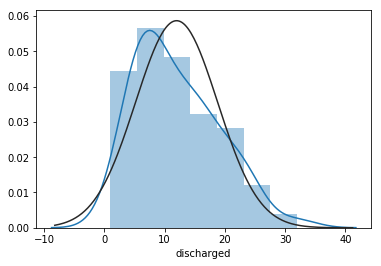

<Figure size 432x288 with 0 Axes>

In [17]:
sns.distplot(patient['discharged'].dropna(), fit=norm);
fig = plt.figure()

Since the distribution seems right skewed the mean is a little bit higher than the mode. The average day of stay in the hospital is 12.

In [18]:
patient['discharged'].describe()

count    56.000000
mean     12.000000
std       6.864931
min       1.000000
25%       7.000000
50%      10.500000
75%      16.250000
max      32.000000
Name: discharged, dtype: float64

The dataset has the column named "state". State displays that the status of the patient. As we see, 98,8% of the patients are isolated.

In [19]:
func = lambda x: 100*x.count()/patient['state'].dropna().shape[0]
state=patient.pivot_table("patient_id", index='state', aggfunc=func)\
.sort_values(by="patient_id", ascending=False); state

,patient_id
state,
isolated,98.830855
released,0.711653
deceased,0.457491


* I draw a box plot to see is there any correlation between infection reason and stay in hospital. 
* It can be seen that visiting Wuhan requires more days for recovery among other visiting reasons. 
* Contact with patient as an infection reason varies more in terms of staying hospital.

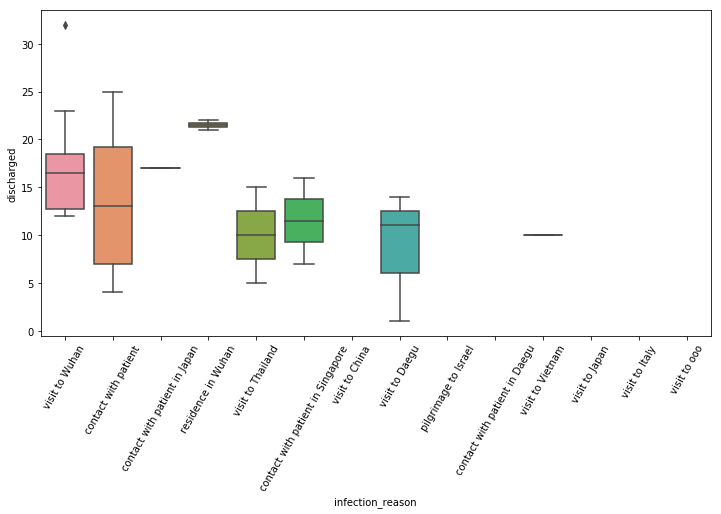

In [20]:
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x='infection_reason', y='discharged', data=patient)
plt.xticks(rotation=60);

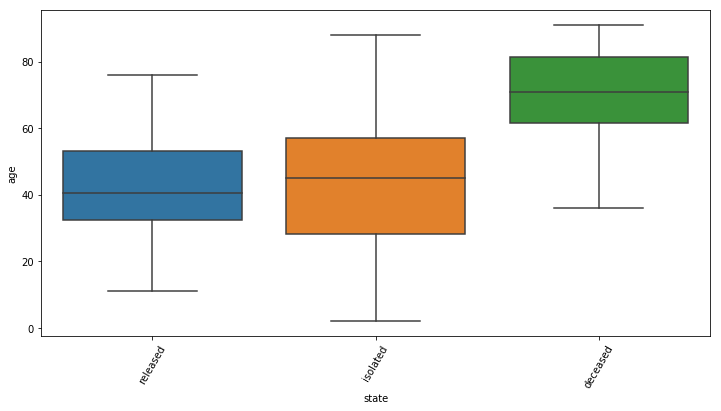

In [21]:
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x='state', y='age', data=patient)
plt.xticks(rotation=60);

The average age of deceased around 70. The minimum average age for the released patients is 40.

**Final Thoughts**

* After the precautions the government takes, it can be seen that cases are decreasing drastically.
* The states of the cases may vary according to patient's age. Gender doesn't show any meaningful difference.
* The number of cases for women is more than men in the days which infection spread aggressively. However, the number of cases decreasing more for women more than men.
* On average recovery time is around 10-12 days.
* In the first days, coronavirus was spread by the patients who visit Wuhan.
* Contact with the patient is the most important reason to spread the coronavirus.


Thank you!
